In [122]:
#!/usr/bin/env python
# coding: utf-8

# This NN uses the Keras API with Tensorflow backend. Start by importing all necessary packages.

# In[9]:



import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from numpy.random import normal, seed
import sklearn.linear_model as slm
from sklearn.preprocessing import scale
import sklearn.model_selection as ms
from math import sqrt
import keras
import keras.models as models
import keras.layers as layers
from keras.layers import Dropout, LeakyReLU
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from tensorflow import set_random_seed

get_ipython().run_line_magic('matplotlib', 'inline')

Text(0.5, 1.0, 'Standard Deviations of Income vs Difference from Avg. Number of Vactions')

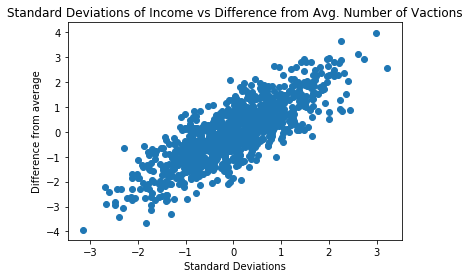

In [123]:
# First, we need some data. It will be randomly generated, 
#because I don't have access to any mass amounts of data such as through AWS. 
#So we are going to pretend that this data represents something real.
corrcoef = np.array([[.99, 1], [1, 1.5]])
mean = np.array([0, 0])

nr.seed(9921)
sample = nr.multivariate_normal(mean, cov, 1000)

indx = range(sample.shape[0])
nr.seed(9988) #Creating a seed adds randomness to our numpy array
set_random_seed(5566)
indx = ms.train_test_split(indx, test_size = 100)#out of 1000 values, use 100 random ones for testing data.
x_train = np.ravel(sample[indx[0],[0]])#Create x values for training
y_train = np.ravel(sample[indx[0],[0]])#create y values for training
x_test = np.ravel(sample[indx[1],[1]])
y_test = np.ravel(sample[indx[1],[1]])

plt.scatter(sample[:,0], sample[:,1])
plt.xlabel('Standard Deviations')
plt.ylabel('Difference from average')
plt.title('Standard Deviations of Income vs Difference from Avg. Number of Vactions')


Train on 900 samples, validate on 100 samples
Epoch 1/10
900/900 [==============================] - 1s 1ms/step - loss: 2.0384 - mean_absolute_error: 0.6705 - val_loss: 2.2335 - val_mean_absolute_error: 0.7521
Epoch 2/10
900/900 [==============================] - 1s 558us/step - loss: 1.7097 - mean_absolute_error: 0.4876 - val_loss: 1.7424 - val_mean_absolute_error: 0.5076
Epoch 3/10
900/900 [==============================] - 0s 541us/step - loss: 1.4883 - mean_absolute_error: 0.3267 - val_loss: 1.4710 - val_mean_absolute_error: 0.3162
Epoch 4/10
900/900 [==============================] - 1s 556us/step - loss: 1.3932 - mean_absolute_error: 0.2328 - val_loss: 1.3434 - val_mean_absolute_error: 0.1904
Epoch 5/10
900/900 [==============================] - 0s 546us/step - loss: 1.3290 - mean_absolute_error: 0.1802 - val_loss: 1.2935 - val_mean_absolute_error: 0.1375
Epoch 6/10
900/900 [==============================] - 0s 526us/step - loss: 1.3097 - mean_absolute_error: 0.1669 - val_loss: 1

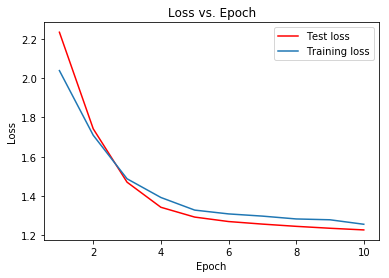

In [124]:
# ### Now, create a simple neural network

nn = models.Sequential() #Create a sequential NN object

#Make a first input layer of 128 parameters. This is all we need for such a simple function.
nn.add(layers.Dense(128, activation = 'relu', input_shape = (1, ),kernel_regularizer=regularizers.l2(0.01)))
nn.add(Dropout(0.5))
nn.add(layers.Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
#Make the output layer
nn.add(layers.Dense(1))


# Define the callback list
filepath = 'my_model_file.hdf5' # define where the model is saved
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor = 'val_loss', # Use accuracy to monitor the model
        patience = 1 # Stop after one step with lower accuracy
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = filepath, # file where the checkpoint is saved
        monitor = 'val_loss', # Don't overwrite the saved model unless val_loss is worse
        save_best_only = True # Only save model if it is the best
    )
]


#Before we train the NN, we need to make a graphing method for the loss vs time
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()

#Now, let us train the NN. We will use Stochastic Gradient Descent to optimize this nn.
sgd = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.5, nesterov=False)

nn.compile(optimizer = sgd, loss = 'mse', metrics = ['mae'])#compile the nn, use mean squared error for loss
nr.seed(892)
set_random_seed(8124)
history = nn.fit(x_train, y_train, epochs = 10, batch_size = 1, validation_data = (x_test, y_test),
                callbacks = callbacks_list, verbose = 1)

plot_loss(history)

1.7880560904582616


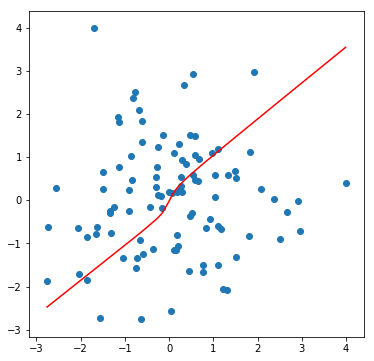

In [125]:
def plot_reg(x, y_score, y):
    ax = plt.figure(figsize=(6, 6)).gca() # define axis
    
    ## Get the data in plot order
    xy = sorted(zip(x,y_score))
    x = [x for x, _ in xy]
    y_score = [y for _, y in xy]

    ## Plot the result
    plt.plot(x, y_score, c = 'red')
    plt.scatter(x, y)
    
predicted = nn.predict(x_test)
plot_reg(x_test, predicted, y_test)
print(np.std(predicted - y_test))

In [126]:
print(nn.predict([1]))

[[1.0431849]]


In [127]:
nn.get_layer(index = 2).get_weights()

[array([[-0.06126275, -0.0309479 , -0.07760526, ..., -0.04293418,
         -0.03709059,  0.02348075],
        [ 0.03798877,  0.13706112,  0.10250294, ..., -0.11522736,
         -0.06300906,  0.1210476 ],
        [-0.08803804, -0.12719078, -0.12771527, ..., -0.13242137,
          0.01806961,  0.00857152],
        ...,
        [ 0.06741426,  0.02101992, -0.003436  , ...,  0.11098462,
         -0.08550715, -0.07276057],
        [-0.04182516, -0.08730829,  0.12635589, ...,  0.1252801 ,
         -0.03306001,  0.08187702],
        [ 0.04776496,  0.03424266,  0.08931233, ..., -0.10198992,
          0.11587075, -0.13285977]], dtype=float32),
 array([-5.3300192e-03, -1.7128614e-04,  4.6090549e-03, -1.7042277e-02,
         4.2496130e-02, -6.1368925e-04,  6.7091390e-02, -1.6115058e-02,
        -1.3070768e-03,  2.3764996e-02,  1.4331279e-02, -1.7304644e-02,
        -9.4909966e-03,  2.4898266e-02, -2.1782344e-02, -4.2035524e-03,
         8.8829100e-03, -3.8596692e-03, -1.7441459e-02,  1.4283254e-03